# DEEP LEARNING METHOD TO PREDICT YAHOO STOCK MARKET PRICES USING LSTM MODEL 

> ### Long Short-Term Memory (LSTM) is a type of Recurrent Neural Network (RNN) that is specifically designed to handle sequential data, such as time series, speech, and text. LSTM networks are capable of learning long-term dependencies in sequential data, which makes them well suited for tasks such as language translation, speech recognition, and time series forecasting.

> ### It tackled the problem of long-term dependencies of RNN in which the RNN cannot predict the word stored in the long-term memory but can give more accurate predictions from the recent information. LSTM can by default retain the information for a long period of time. It is used for processing, predicting, and classifying on the basis of time-series data. 

## PREREQUISITES

#### !pip install tensorflow keras numpy matplotlib pandas yfinance

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import matplotlib.dates as mdates

## DATA PREPROCESSING AND PREPARATION

In [2]:
Stock = yf.download('SPY', start='2010-01-01', end='2023-01-01')

# Split data into training (2010-2020) and validation (2020-2023) sets
training_data = Stock['Adj Close']['2010-01-01':'2020-12-31']
validation_data = Stock['Adj Close']['2021-01-01':'2023-01-01']

training_set = training_data.values.reshape(-1, 1)
validation_set = validation_data.values.reshape(-1, 1)

[*********************100%%**********************]  1 of 1 completed


In [3]:
print(Stock)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04  112.370003  113.389999  111.510002  113.330002   87.483192   
2010-01-05  113.260002  113.680000  112.849998  113.629997   87.714767   
2010-01-06  113.519997  113.989998  113.430000  113.709999   87.776497   
2010-01-07  113.500000  114.330002  113.180000  114.190002   88.147049   
2010-01-08  113.889999  114.620003  113.660004  114.570000   88.440392   
...                ...         ...         ...         ...         ...   
2022-12-23  379.649994  383.059998  378.029999  382.910004  378.706635   
2022-12-27  382.790009  383.149994  379.649994  381.399994  377.213226   
2022-12-28  381.329987  383.390015  376.420013  376.660004  372.525238   
2022-12-29  379.630005  384.350006  379.079987  383.440002  379.230804   
2022-12-30  380.640015  382.579987  378.429993  382.429993  378.231934   

               Volume  
Date         

In [3]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
validation_set_scaled = sc.transform(validation_set)

## BUILDING THE LSTM MODEL

### PREPARING INPUT DATA FOR THE MODEL

In [4]:
# Creating input sequences for training
def create_sequences(data, seq_length=60):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(training_set_scaled)
X_validation, y_validation = create_sequences(validation_set_scaled)

# Reshape inputs for LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_validation = np.reshape(X_validation, (X_validation.shape[0], X_validation.shape[1], 1))

### LSTM MODEL ARCHITECTURE 

In [5]:
model = keras.Sequential()
model.add(keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50, return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50, return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=1))

### TRAINING THE MODEL 

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=45, batch_size=32, validation_data=(X_validation, y_validation))


Epoch 1/45

85/85 [==============================] - 24s 136ms/step - loss: 0.0108 - val_loss: 0.0113
Epoch 2/45
85/85 [==============================] - 8s 99ms/step - loss: 0.0028 - val_loss: 0.0031
Epoch 3/45
85/85 [==============================] - 8s 100ms/step - loss: 0.0026 - val_loss: 0.0080
Epoch 4/45
85/85 [==============================] - 8s 97ms/step - loss: 0.0023 - val_loss: 0.0039
Epoch 5/45
85/85 [==============================] - 8s 96ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 6/45
85/85 [==============================] - 8s 93ms/step - loss: 0.0023 - val_loss: 0.0038
Epoch 7/45
85/85 [==============================] - 8s 88ms/step - loss: 0.0020 - val_loss: 0.0103
Epoch 8/45
85/85 [==============================] - 7s 87ms/step - loss: 0.0019 - val_loss: 0.0438
Epoch 9/45
85/85 [==============================] - 9s 100ms/step - loss: 0.0018 - val_loss: 0.0036
Epoch 10/45
85/85 [==============================] - 10s 115ms/step - loss: 0.0017 - val_loss: 0.0031
E

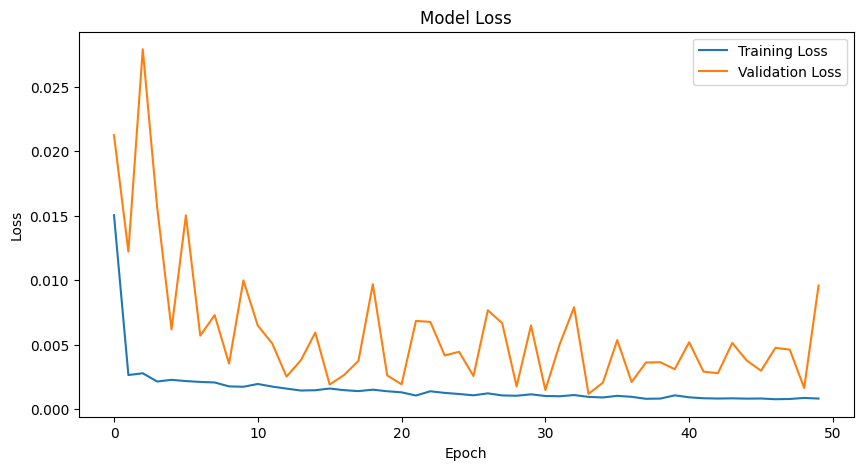

In [7]:
# Plot loss and accuracy during training
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## PREPARING TEST DATA

In [8]:
Stock_test = yf.download('SPY', start='2022-01-01', end='2023-07-31')

real_stock_price = Stock_test['Adj Close'].values.reshape(-1, 1)


[*********************100%%**********************]  1 of 1 completed


In [9]:
dataset_total = pd.concat((Stock['Adj Close'], Stock_test['Adj Close']), axis=0)
inputs = dataset_total[len(dataset_total) - len(Stock_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

## MAKING PREDICTIONS

In [10]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

13/13 [==============================] - 2s 23ms/step


In [12]:
predicted_stock_price

array([[361.41602],
       [360.96704],
       [361.4254 ],
       [362.99234],
       [365.67856],
       [369.33725],
       [373.72516],
       [378.5821 ],
       [383.6573 ],
       [388.69427],
       [393.48056],
       [397.82092],
       [401.56113],
       [404.5939 ],
       [406.84015],
       [408.29858],
       [409.0028 ],
       [409.02655],
       [408.4665 ],
       [407.4894 ],
       [406.30182],
       [405.09848],
       [404.04764],
       [403.20938],
       [402.602  ],
       [402.20657],
       [402.00507],
       [402.00403],
       [402.16187],
       [402.38504],
       [402.581  ],
       [402.7159 ],
       [402.78476],
       [402.75134],
       [402.57745],
       [402.22238],
       [401.63364],
       [400.81967],
       [399.86426],
       [398.8567 ],
       [397.84393],
       [396.89432],
       [396.05185],
       [395.32443],
       [394.64487],
       [393.93176],
       [393.1801 ],
       [392.40112],
       [391.59076],
       [390.736  ],


## VISUALIZING RESULTS 

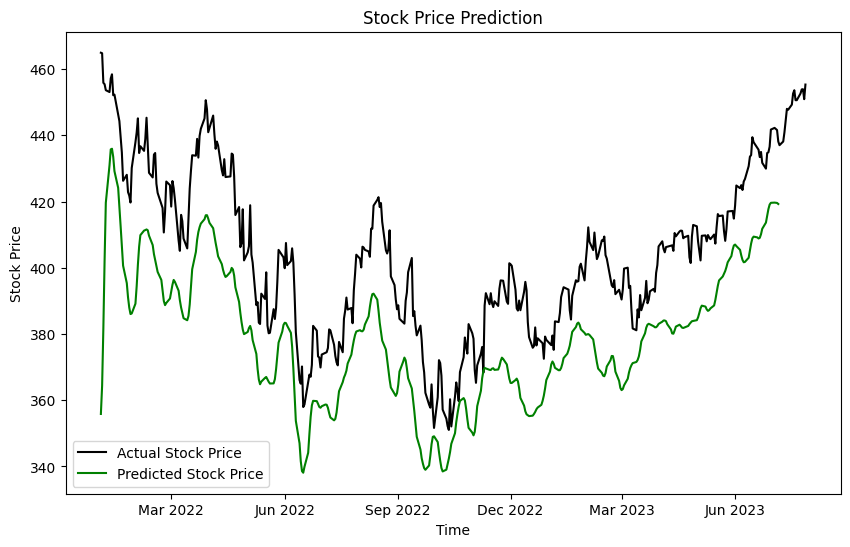

In [11]:
date_range = pd.date_range(start='2022-01-01', periods=len(predicted_stock_price), freq='B')  
plt.figure(figsize=(10, 6))
plt.plot(Stock_test.index, real_stock_price, color='black', label='Actual Stock Price')
plt.plot(date_range, predicted_stock_price, color='green', label='Predicted Stock Price')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## METRICS FOR ACCURACY

In [14]:
# Define a function to calculate the directional accuracy
def directional_accuracy(y_true, y_pred):
    # Convert the arrays to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    # Calculate the sign of the difference between the actual and predicted values
    sign = np.sign(y_true[1:] - y_true[:-1]) * np.sign(y_pred[1:] - y_pred[:-1])
    # Count the number of positive signs
    positive = np.sum(sign > 0)
    # Calculate the percentage of positive signs
    percentage = positive / len(sign) * 100
    # Return the percentage
    return percentage

# Calculate the directional accuracy for the test set
da = directional_accuracy(real_stock_price, predicted_stock_price)
# Print the directional accuracy
print('The directional accuracy of the model is:', da)


The directional accuracy of the model is: 50.12722646310432


In [13]:
from sklearn import metrics

rmse = metrics.mean_squared_error(real_stock_price, predicted_stock_price, squared=False)
mape = metrics.mean_absolute_percentage_error(real_stock_price, predicted_stock_price)
mae = metrics.mean_absolute_error(real_stock_price, predicted_stock_price)

print('The Root Mean Squared Error of the model is:', rmse)
print('The Mean Absolute Percentage Error of the model is:', mape)
print('The Mean Absolute Error of the model is:', mae)


The Root Mean Squared Error of the model is: 11.784873827312238
The Mean Absolute Percentage Error of the model is: 0.020258979124951504
The Mean Absolute Error of the model is: 8.244002134061708


> HIGHER DA VALUE INDICATES BETTER FIT OF THE MODEL

> LOWER RMSE VALUE INDICATES BETTER FIT OF THE MODEL 

> LOWER MAPE VALUE INDICATES BETTER FIT OF THE MODEL 

> LOWER MAE VALUE INDICATES BETTER FIT OF THE MODEL 